# И так, давайте посмотрим на применение Word2Vec
## Для этого воспользуемся модулем Gensim

In [4]:
!wget https://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

'wget' 不是内部或外部命令，也不是可运行的程序
或批处理文件。
'unzip' 不是内部或外部命令，也不是可运行的程序
或批处理文件。


In [5]:
import numpy as np

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors, translation_matrix
from gensim.scripts.glove2word2vec import glove2word2vec

from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

Gensim - модуль для моделирования схожести текста и слов, и не совсем является инструментом deep learning. Однако для наших целей визуализации свойств Word2Vec подходит идеально

Мы воспользуемся готовым набором вектором, который мы скачали ранее

In [9]:
path = 'C:/Users/wangshu202040/Skill_Notebooks_2ndY/Mod_1_Word_to_Vec/glove.6B/glove.6B.100d.txt'
# path = '\glove.6B\glove.6B.100d.txt'
glove_file = datapath(path)
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

<ipython-input-9-478a19e8d7aa>:5: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [10]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

Теперь мы можем исследовать нашу модель. Давайте начнем с простого - с поиска похожих по смыслу векторов.

In [11]:
model.most_similar("teacher")

[('student', 0.8083398938179016),
 ('school', 0.7545564770698547),
 ('teaching', 0.7521439790725708),
 ('taught', 0.741184651851654),
 ('teachers', 0.7291542887687683),
 ('graduate', 0.7134961485862732),
 ('instructor', 0.7077120542526245),
 ('students', 0.6828974485397339),
 ('teaches', 0.6552315354347229),
 ('education', 0.6528989672660828)]

In [12]:
model.most_similar("tolstoy")

[('dostoyevsky', 0.7424925565719604),
 ('turgenev', 0.7075357437133789),
 ('dostoevsky', 0.66252201795578),
 ('kafka', 0.6395878195762634),
 ('chekhov', 0.6364997029304504),
 ('pushkin', 0.6059387922286987),
 ('karenina', 0.5865063667297363),
 ('nietzsche', 0.5751049518585205),
 ('dracula', 0.5683380961418152),
 ('dickens', 0.5477892756462097)]

Можно также отобразить "облако" слов на одном графике 

PCA - principal component analysis - один из способов уменьшить размерность данных, потеряв при этом наименьшее количество информации

In [20]:
def show_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        words = np.random.choice(list(model.key_to_index.keys()), sample) if sample > 0 else [
            word for word in model.key_to_index]

    word_vectors = np.array([model[w] for w in words])

    dim_reduction = PCA().fit_transform(word_vectors)[:, :2]

    plt.figure(figsize=(10, 10))
    plot = sns.scatterplot(x=dim_reduction[:, 0], y=dim_reduction[:, 1])
    for word, (x, y) in zip(words, dim_reduction):
        plot.text(x+0.05, y+0.05, word)

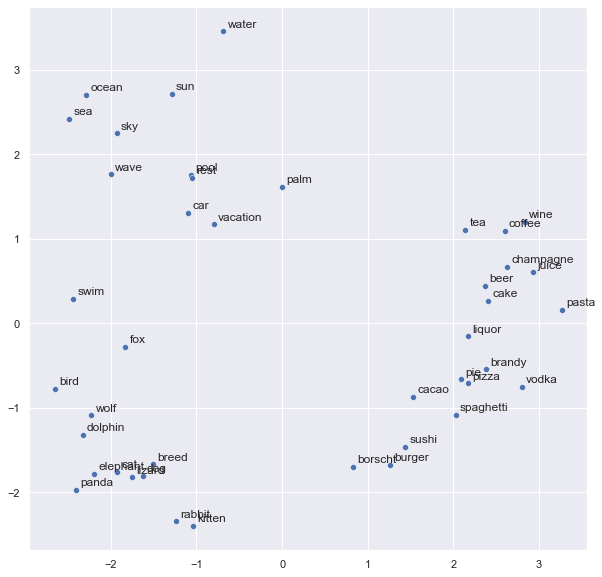

In [21]:
show_pca_scatterplot(model, 
                     ['dog', 'cat', 'kitten' , 'lizard', 'wolf', 'bird', 'panda', 'elephant', 'breed', 'fox', 'rabbit',
                     'coffee', 'tea', 'juice', 'cacao', 'vodka', 'wine', 'beer', 'brandy', 'champagne', 'liquor',
                     'sea', 'vacation', 'dolphin', 'ocean', 'wave', 'swim', 'pool', 'rest', 'palm', 'sun', 'sky', 'water',
                     'pizza', 'pie', 'spaghetti', 'borscht', 'cake', 'burger', 'pasta', 'sushi','car'])

Можно так же взять рандомные слова из словаря и ограничить их количество с помощюю kwarg sample

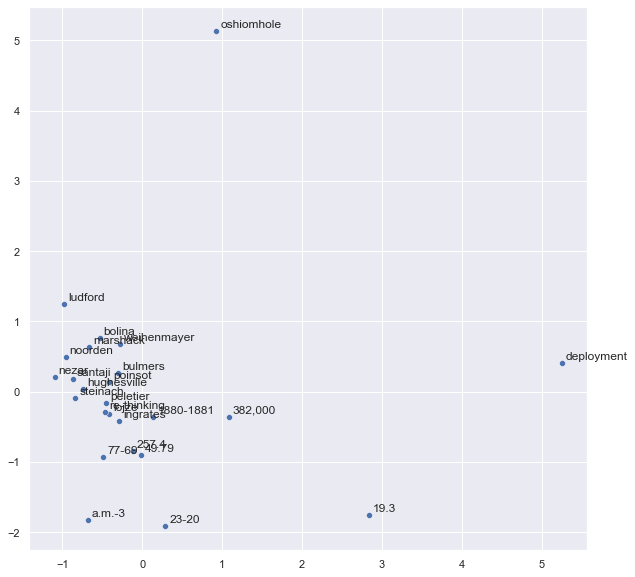

In [24]:
show_pca_scatterplot(model, sample=25)

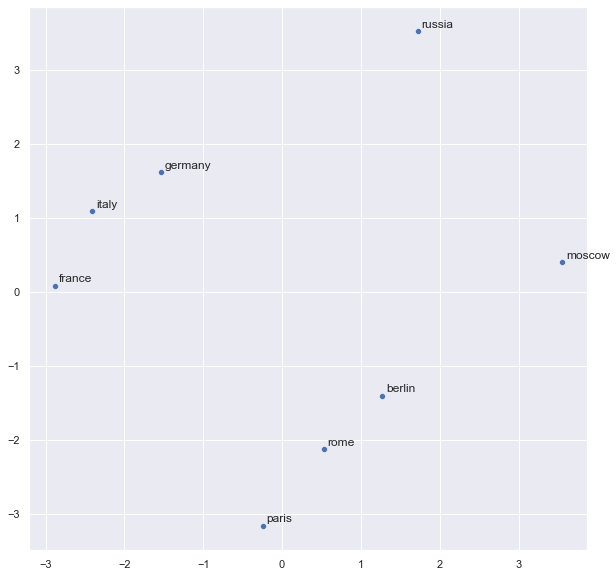

In [25]:
show_pca_scatterplot(model, 
                     ['rome', 'moscow', 'paris' , 'berlin', 'italy', 'russia', 'france', 'germany'])

Так выглядит поиск аналогий в Word2Vec

"Rome" - "Italy" + "China" = "Bejing"



In [26]:
result = model.most_similar(positive=['rome', 'china'], negative=['italy'])
print(f'{result[0][0]}: {round(result[0][1], 3)}')

beijing: 0.805


"King" -"Man" + "Woman" = "Queen"

![image.png](https://blog.acolyer.org/wp-content/uploads/2016/04/word2vec-king-queen-vectors.png)

[image source](https://blog.acolyer.org/2016/04/21/the-amazing-power-of-word-vectors/)

"Retell" - "Tell" + "Marry" 

In [27]:
result = model.most_similar(positive=['retell', 'marry'], negative=['tell'])
print(f'{result[0][0]}: {round(result[0][1], 3)}')

uncouple: 0.601


"Surgeon" - "Man" + "Woman" ~= "Nurse" 

“Cosmetics” - “Woman” + “Man” ~= “Pharmaceuticals”

“Feminism” - “Woman” + “Man” ~= “Conservatism”

“Computer programmer” - “Man” + “Woman” ~= “Homemaker”
